In [1]:
import pandas as pd
from lxml import etree
import seaborn as sns

In [2]:
root = etree.parse("emissions.xml").getroot()

In [3]:
elems = []

for time in root:
    for veh in time:
        d_tmp = {}
        for k, v in veh.items():
            if k not in ["id", "NOx", "electricity", "type", "x", "y"]:
                continue
            if k not in ['id', 'type']:
                d_tmp[k] = float(v)
            else:
                d_tmp[k] = v
        d_tmp["time"] = float(time.attrib['time'])
        elems.append(d_tmp)

In [4]:
df = pd.DataFrame(elems)
df = df.astype({'time':'int'})

In [5]:
times = []

time_str = "2022/01/01 00:00"

for d in df['time']:
    times.append(pd.to_datetime(time_str) + pd.Timedelta(seconds=int(d)))
    
df['timedelta'] = df['time']
df['time'] = times

df_test =df[df['id'] == 'truck0']

In [6]:
x_coords = {}
y_coords = {}

x1 = 12.532868
y1 = 55.671349
x2 = 12.594002
y2 = 55.727314

t1 = (x2 - x1)/9
t2 = (y2 - y1)/9

for i in range(10):
    i1 = x1 + i*t1
    i2 = x1 + (i+1)*t1
    i_mean = (i1+i2)/2
    x_coords[str(i+1)] = {"x1": i1, "x2": i2, "x_mean": i_mean}
    
for i in range(10):
    j1 = y1 + i*t2
    j2 = y1 + (i+1)*t2
    y_mean = (j1+j2)/2
    y_coords[str(i+1)] = {"y1": j1, "y2": j2, "y_mean": y_mean}
    
coords_d = {}
for g1, v1 in x_coords.items():
    for g2, v2 in y_coords.items():
        coords_d[f"{g1}_{g2}"] = {"x": v1["x_mean"], "y": v2["y_mean"]}

In [8]:
df.to_parquet("osterbro.parquet")

In [45]:
grid_x = []
grid_y = []
gridz = []

for idx,row in df.iterrows():
    for g1, v1 in x_coords.items():
        if v1['x1'] <= row['x'] <= v1['x2']:
            xx = g1
    for g2, v2 in y_coords.items():
        if v2['y1'] <= row['y'] <= v2['y2']:
            yy = g2
            
    
    gridz.append(f"{xx}_{yy}")
    
df['grid'] = gridz

In [49]:
df_grid = pd.DataFrame()

#g_data = df.groupby('grid').get_group('6_6')
#g_name = "6_6"

for g_name, g_data in df.groupby('grid'):
    for t_name, t_data in g_data.groupby('time'):
        df_grid = pd.concat([df_grid, pd.DataFrame({'grid': g_name, 'time': t_name, 'NOx': g_data['NOx'].sum()}, index=[0])], axis=0, ignore_index=True)

In [59]:
df_grid

,grid,time,NOx
0,4_4,2022-01-01 00:07:55,1252.51
1,4_4,2022-01-01 00:07:56,1252.51
2,4_4,2022-01-01 00:07:57,1252.51
3,4_4,2022-01-01 00:07:58,1252.51
4,4_4,2022-01-01 00:07:59,1252.51
...,...,...,...
78619,9_7,2022-01-01 01:05:30,76426.89
78620,9_7,2022-01-01 01:05:31,76426.89
78621,9_7,2022-01-01 01:05:32,76426.89
78622,9_7,2022-01-01 01:05:33,76426.89


In [52]:
df.groupby('timedelta').get_group(0)

,id,NOx,electricity,type,x,y,time,timedelta,grid
0,truck0,38.95,0.00,truck_petrol,12.572871,55.708206,2022-01-01,0,6_6
1,veh0,0.00,1.03,veh_hybrid,12.576520,55.693703,2022-01-01,0,7_4


In [57]:

grid_tmp = df_grid[df_grid['grid'] == "6_6"]

In [58]:
grid_tmp['NOx'].unique()

array([381988.66])

In [10]:
df.head()

,id,NOx,electricity,type,x,y,time,timedelta,grid
0,truck0,38.95,0.00,truck_petrol,12.572871,55.708206,2022-01-01 00:00:00,0,6_6
1,veh0,0.00,1.03,veh_hybrid,12.576520,55.693703,2022-01-01 00:00:00,0,7_4
2,truck0,41.67,0.00,truck_petrol,12.572886,55.708209,2022-01-01 00:00:01,1,6_6
3,veh0,0.00,0.00,veh_hybrid,12.576334,55.693773,2022-01-01 00:00:01,1,7_4
4,truck0,42.54,0.00,truck_petrol,12.572912,55.708214,2022-01-01 00:00:02,2,6_6


In [27]:
df_grid.to_csv('grid.csv')

In [31]:
df_grid

,x,y,time,NOx
0,12.556642,55.693113,2022-01-01 00:07:55,1252.51
1,12.556642,55.693113,2022-01-01 00:07:56,1252.51
2,12.556642,55.693113,2022-01-01 00:07:57,1252.51
3,12.556642,55.693113,2022-01-01 00:07:58,1252.51
4,12.556642,55.693113,2022-01-01 00:07:59,1252.51
...,...,...,...,...
78619,12.590606,55.711768,2022-01-01 01:05:30,76426.89
78620,12.590606,55.711768,2022-01-01 01:05:31,76426.89
78621,12.590606,55.711768,2022-01-01 01:05:32,76426.89
78622,12.590606,55.711768,2022-01-01 01:05:33,76426.89


In [29]:
df['x_grid'] = df_grid['x']
df['y_grid'] = df_grid['y']
df['nox_grid'] = df_grid['NOx']

In [30]:
df

,id,NOx,electricity,type,x,y,time,timedelta,grid,x_grid,y_grid,nox_grid
0,truck0,38.95,0.00,truck_petrol,12.572871,55.708206,2022-01-01 00:00:00,0,6_6,12.556642,55.693113,1252.51
1,veh0,0.00,1.03,veh_hybrid,12.576520,55.693703,2022-01-01 00:00:00,0,7_4,12.556642,55.693113,1252.51
2,truck0,41.67,0.00,truck_petrol,12.572886,55.708209,2022-01-01 00:00:01,1,6_6,12.556642,55.693113,1252.51
3,veh0,0.00,0.00,veh_hybrid,12.576334,55.693773,2022-01-01 00:00:01,1,7_4,12.556642,55.693113,1252.51
4,truck0,42.54,0.00,truck_petrol,12.572912,55.708214,2022-01-01 00:00:02,2,6_6,12.556642,55.693113,1252.51
...,...,...,...,...,...,...,...,...,...,...,...,...
567773,veh1594,0.00,1.94,veh_hybrid,12.589862,55.696366,2022-01-01 01:06:57,4017,9_5,NaN,NaN,NaN
567774,veh1594,0.00,2.32,veh_hybrid,12.589947,55.696400,2022-01-01 01:06:58,4018,9_5,NaN,NaN,NaN
567775,veh1594,0.00,2.34,veh_hybrid,12.590054,55.696444,2022-01-01 01:06:59,4019,9_5,NaN,NaN,NaN
567776,veh1594,0.00,1.29,veh_hybrid,12.590168,55.696418,2022-01-01 01:07:00,4020,9_5,NaN,NaN,NaN


In [126]:
df['grid_x'] = grid_x
df['grid_y'] = grid_y

In [129]:
df.groupby('timedelta').get_group(0)

,id,NOx,electricity,type,x,y,time,timedelta,grid_x,grid_y
45,truck0,65.78,0.00,truck_petrol,12.573651,55.708359,2022-01-01 00:00:10,10,12.577020,55.705550
46,truck1,60.91,0.00,truck_petrol,12.561012,55.709750,2022-01-01 00:00:10,10,12.563435,55.711768
47,truck2,39.42,0.00,truck_petrol,12.580011,55.712842,2022-01-01 00:00:10,10,12.577020,55.711768
48,truck3,38.95,0.00,truck_petrol,12.576280,55.702175,2022-01-01 00:00:10,10,12.577020,55.699331
49,veh0,0.00,2.06,veh_hybrid,12.576408,55.694346,2022-01-01 00:00:10,10,12.577020,55.693113
50,veh1,0.00,1.01,veh_hybrid,12.576901,55.702426,2022-01-01 00:00:10,10,12.577020,55.699331
51,veh2,0.00,0.00,veh_diesel,12.574343,55.700656,2022-01-01 00:00:10,10,12.577020,55.699331
52,veh3,0.01,0.00,veh_diesel,12.572236,55.708232,2022-01-01 00:00:10,10,12.570228,55.705550
53,veh4,0.00,1.60,veh_ev,12.586769,55.693688,2022-01-01 00:00:10,10,12.583813,55.693113


In [112]:
df_test.to_csv("testo.csv")

In [115]:
df.to_csv("test1.csv")

In [116]:
df.head()
    
#df['time'] = times

,id,NOx,electricity,type,x,y,time,grid_x,grid_y
0,truck0,38.95,0.00,truck_petrol,12.572871,55.708206,2022-01-01 00:00:00,12.570228,55.705550
1,veh0,0.00,1.03,veh_hybrid,12.576520,55.693703,2022-01-01 00:00:00,12.577020,55.693113
2,truck0,41.67,0.00,truck_petrol,12.572886,55.708209,2022-01-01 00:00:01,12.570228,55.705550
3,veh0,0.00,0.00,veh_hybrid,12.576334,55.693773,2022-01-01 00:00:01,12.577020,55.693113
4,truck0,42.54,0.00,truck_petrol,12.572912,55.708214,2022-01-01 00:00:02,12.570228,55.705550


In [120]:
df.groupby('time').get_groups()

AttributeError: 'DataFrameGroupBy' object has no attribute 'get_groups'

In [9]:
df.to_parquet("emissions.parquet")

In [97]:
df_out = pd.DataFrame()

for v_type, v_data in df.groupby('type'):
    df_ems = v_data.groupby('time').sum()
    df_out[v_type] = df_ems['NOx'].cumsum()

In [98]:
df_out

,truck_hybrid,truck_petrol,veh_diesel,veh_ev,veh_hybrid,veh_petrol
time,,,,,,
14.0,0.0,1935.96,0.09,0.0,0.0,NaN
15.0,0.0,2040.00,0.09,0.0,0.0,NaN
16.0,0.0,2240.01,0.10,0.0,0.0,NaN
17.0,0.0,2477.89,0.12,0.0,0.0,NaN
18.0,0.0,2637.15,0.15,0.0,0.0,NaN
...,...,...,...,...,...,...
3796.0,0.0,7622141.76,443.69,NaN,0.0,1758.17
3797.0,0.0,7622526.20,443.75,NaN,0.0,1758.41
3798.0,0.0,7623101.95,443.80,NaN,0.0,1758.59


<AxesSubplot:xlabel='time'>

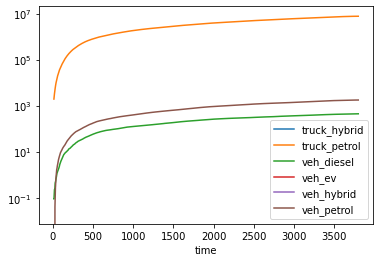

In [99]:
df_out.plot(kind="line", logy=True)

In [72]:
t = df_ems[df_ems.index.get_level_values('type') == 'truck_gas']

<AxesSubplot:xlabel='time', ylabel='NOx'>

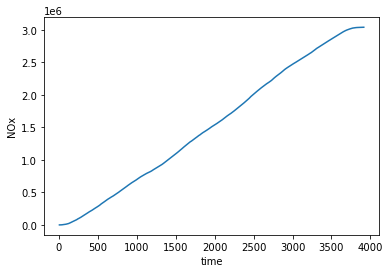

In [79]:
sns.lineplot(x=t["time"], y=t["NOx"].cumsum())